# Telecom Churn Case Study
PG Diploma in Machine Learning and AI March 2018<br/>
Group Members
1. Reghuram Vasanthakumari
2. Sanjoy Krishna Ghosh
3. Dipesh Singhal
4. Naveen Bharadwaj

The analysis is divided into following parts<br/>
1. Filter high-value customers<br/>
2. Handlling The Missing Values<br/>
3. Derive new features<br/>
4. Splitting the Test and Train Data<br/>
5. PCA
6. Logistic Regression<br/>
7. SVM<br/>
8. Decission Trees and the key performance index on the data set

Notes

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Functions 
The space for user defined functions

In [22]:
def plot_triangular(corr):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, annot=False, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [23]:
def plot_multiple_distributions(data, targets):
    scale = StandardScaler(copy=False)
    scaled_df = pd.DataFrame(scale.fit(data[targets]).transform(data[targets]), columns=targets)
    for target in targets:
        sns.distplot(scaled_df.loc[:, target], hist=False, rug=False, label=target)
    return None
    

In [24]:
'''
import powerlaw
def power_law_analysis(data, targets):
    for target in targets:
        results = powerlaw.Fit(data.loc[:, target])
        print(results.power_law.alpha)
        print(results.power_law.xmin)
        R, p = results.distribution_compare('power_law', 'lognormal')
'''

"\nimport powerlaw\ndef power_law_analysis(data, targets):\n    for target in targets:\n        results = powerlaw.Fit(data.loc[:, target])\n        print(results.power_law.alpha)\n        print(results.power_law.xmin)\n        R, p = results.distribution_compare('power_law', 'lognormal')\n"

In [25]:
def plot_accuracy(scores, hyper_params):
    for hyper_param in hyper_params:
        hyper_param_name = 'param_'+hyper_param
        plt.figure()
        plt.plot(scores[hyper_param_name], 
         scores["mean_train_score"], 
         label="training accuracy")
        plt.plot(scores[hyper_param_name], 
         scores["mean_test_score"], 
         label="test accuracy")
        plt.xlabel(hyper_param)
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

   ## 1. Load the data
Load the churn data for the telecom provider

In [28]:
try:
    churn_data = pd.read_csv('telecom_churn_data.csv')
except:
    churn_data = pd.read_csv('data/telecom_churn_data.csv')
total_records = churn_data.shape[0]
churn_data.shape

(99999, 226)

## 2. Missing value treatment

In [29]:
missing_value_percentage = round(100 * churn_data.isnull().sum().sort_values(ascending=False) / total_records, 2)
missing_value_percentage[missing_value_percentage > 50.0]

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [30]:
non_kpis_to_be_imputed =['max_rech_data_6', 'max_rech_data_7',  'max_rech_data_8', 'max_rech_data_9']
#These valuses doesn't drive the KPI will replace by zero as per instruction

churn_data[non_kpis_to_be_imputed] = churn_data[non_kpis_to_be_imputed].fillna(0, axis=1)

#impute the missing categorical variable NaN with -1
cat_variables_to_be_imputed = ['night_pck_user_6', 'night_pck_user_7',
                               'night_pck_user_8', 'night_pck_user_9',
                               'fb_user_6', 'fb_user_7',
                               'fb_user_8', 'fb_user_9']
churn_data[cat_variables_to_be_imputed] = churn_data[cat_variables_to_be_imputed].fillna(-1, axis=1)

In [31]:
#date dependant missing values
kpis_imputed_wrt_date = dict( date_of_last_rech_data_6 = ['total_rech_data_6', 
                                                          'count_rech_2g_6', 
                                                          'count_rech_3g_6', 'av_rech_amt_data_6' ],
                             date_of_last_rech_data_7 = ['total_rech_data_7', 
                                                          'count_rech_2g_7', 
                                                          'count_rech_3g_7', 'av_rech_amt_data_7' ], 
                             date_of_last_rech_data_8 = ['total_rech_data_8', 
                                                          'count_rech_2g_8', 
                                                          'count_rech_3g_8', 'av_rech_amt_data_8'],
                             date_of_last_rech_data_9 = ['total_rech_data_9', 
                                                          'count_rech_2g_9', 
                                                          'count_rech_3g_9', 'av_rech_amt_data_9'])


In [32]:

#churn_data_clone = churn_data.copy()
#Replace the date related values if date is present 1 else 0
for date, fields in kpis_imputed_wrt_date.items():
    churn_data.loc[churn_data[date].isnull(), fields] = churn_data.loc[churn_data[date].isnull(), fields].fillna(0)
    churn_data.loc[churn_data[date].notnull(), fields] = churn_data.loc[churn_data[date].notnull(), fields].fillna(1)
        


In [33]:
#Now we can drop the date related data
date_cols = [col for col in churn_data.columns if 'date' in col.lower() ]
churn_data.drop(labels=date_cols, axis=1,  inplace=True, errors='ignore')
churn_data.shape

(99999, 214)

In [35]:
#Now drop the mobile number
churn_data.drop(['mobile_number'],axis=1,inplace=True)

In [37]:
#Identify columns with the same values
unique_val_cols=churn_data.nunique(dropna=False).sort_values()
single_value_cols = unique_val_cols[unique_val_cols < 3].index.values
#Drop the columns with single value or null since this is not going to add any information for training
churn_data.drop(labels=single_value_cols, axis=1, inplace=True)
churn_data.shape

(99999, 201)

In [38]:
#churn_data.loc[:, categorical_vars].fillna(churn_data)
#Replace the rest of missing data with mediam
churn_data_clone = churn_data.copy()
churn_data.fillna(value=churn_data.median(), inplace=True)


,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,...,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,...,0,-1.0,1.0,1.0,-1.0,1006,0.00,0.00,0.00,0.00
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.590,...,0,-1.0,-1.0,-1.0,1.0,1103,0.00,0.00,4.17,0.00
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.010,...,0,-1.0,-1.0,-1.0,-1.0,2491,0.00,0.00,0.00,0.00
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.880,...,0,0.0,-1.0,-1.0,-1.0,1526,0.00,0.00,0.00,0.00
5,50.258,58.810,83.386,170.826,50.16,43.63,85.48,138.79,19.28,13.440,...,0,-1.0,-1.0,-1.0,-1.0,1471,0.00,0.00,0.00,0.00
6,429.023,190.704,255.114,114.751,71.03,45.03,76.66,15.23,262.73,49.240,...,0,-1.0,-1.0,-1.0,-1.0,1673,0.00,0.00,0.00,0.00
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.160,...,0,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.630,...,0,-1.0,1.0,1.0,-1.0,315,21.03,910.65,122.16,0.00
9,119.518,247.435,170.231,160.042,33.89,30.11,22.43,27.84,63.48,54.160,...,0,-1.0,1.0,-1.0,-1.0,902,0.00,0.00,0.00,0.00


In [39]:
#Check for missing values
missing_values = churn_data.isnull().sum()
print("The number records with missing values :", missing_values[missing_values!=0].shape[0])

The number records with missing values : 0


## 3. Derived features
Now that dealt with the missing data now we can look into derived features

In [40]:
hv_kpis = ['total_rech_amt_6', 'total_rech_amt_7', 
           'total_rech_data_6', 'total_rech_data_7', 
           'av_rech_amt_data_6', 'av_rech_amt_data_7']
churn_data['hv_index'] = churn_data[hv_kpis].mean(axis=1)
hv_filtered = False
churn_data.shape

(99999, 202)

In [41]:

if not hv_filtered :
    churn_data = churn_data[churn_data.hv_index >= churn_data.hv_index.quantile(0.7)]
    hv_filtered = True


In [42]:
month_wise_data = dict()
month_wise_data['jun'] = churn_data.filter(regex='(_6$|^jun_)')
month_wise_data['jul'] = churn_data.filter(regex='(_7$|^jul_)')
month_wise_data['aug'] = churn_data.filter(regex='(_8$|^aug_)')
month_wise_data['sep'] = churn_data.filter(regex='(_9$|^sep_)')

In [43]:
for mon, m_data in month_wise_data.items():
    keys = ['t2t', 't2c', 't2m', 't2o', 't2f', 'isd', 'roam', 'vol', 'vbc' ]
    for key in keys:
        churn_data[key+'_total_'+mon] = churn_data.filter(like=key).sum(axis=1)



/home/naveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [44]:


churn_indicator = ['total_ic_mou_9', 'total_og_mou_9', 'vol_3g_mb_9', 'vol_2g_mb_9']
#churn_data.loc[:, 'churned'] = churn_data.loc[:, churn_indicator].su
churn_data['churn'] = churn_data.loc[:, churn_indicator].sum(axis=1).apply(lambda x: 1 if x == 0 else 0)
print('Overall churn rate {}%'.format(round(100*churn_data['churn'].sum()/churn_data['churn'].shape[0], 2)))
churn_phase_features_dropped =  False

Overall churn rate 8.19%


/home/naveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Dropping the churn phase features


In [46]:

if not churn_phase_features_dropped:
    churn_phase_cols =  churn_data.filter(like='_9').columns
    churn_data.drop(churn_phase_cols, axis=1,  inplace=True )
    churn_phase_features_dropped = True

/home/naveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Identifying the Categorical variables

In [50]:
#Let's check the other categorical data 
unique_val_cols=churn_data.loc[:, churn_data.columns != 'churn'].nunique().sort_values()
#Get the features with atmost 35 unique values. 35 is just a jueristics
possible_cat_vars = unique_val_cols[unique_val_cols < 35].index.values
print("Possible categorical variables \n", possible_cat_vars)
#In Consulation with data dictionary the excluding the count_* features since they are quantile in nature
categorical_vars = [var for var in possible_cat_vars if 'count_' not in var]
print("Selected categorical variables \n", categorical_vars)

Possible categorical variables 
 ['t2o_total_jul' 't2o_total_sep' 't2o_total_jun' 't2o_total_aug'
 'fb_user_8' 'fb_user_7' 'night_pck_user_6' 'fb_user_6' 'night_pck_user_8'
 'night_pck_user_7' 'monthly_2g_6' 'monthly_2g_7' 'monthly_2g_8'
 'monthly_3g_8' 'monthly_3g_6' 'monthly_3g_7' 'count_rech_3g_6'
 'sachet_3g_6' 'sachet_3g_7' 'count_rech_3g_7' 'sachet_3g_8'
 'count_rech_3g_8' 'count_rech_2g_6' 'sachet_2g_6' 'count_rech_2g_8'
 'sachet_2g_8']
Selected categorical variables 
 ['t2o_total_jul', 't2o_total_sep', 't2o_total_jun', 't2o_total_aug', 'fb_user_8', 'fb_user_7', 'night_pck_user_6', 'fb_user_6', 'night_pck_user_8', 'night_pck_user_7', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_8', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_2g_6', 'sachet_2g_8']


## 3. Feature Analysis
Treating outlier values

In [51]:
business_features = ['arpu_(6|7|8|9)', 'mou', 'amt', 'vol', 'vbc']
length = len(business_features)

In [52]:
churn_data.shape

(30000, 190)

The above distributions are more of **Heavy Tailed Distribution**  for the feature  variables

Execute them to see the Distribution graph

# Data modelling
## 1. Principle Component Analysis
### a. Data transformation of categorical variables 
For categorical variable replace the category with churn rate associated with group

In [53]:
#Create Copy of churn_data for further PCA  analysis
pca_churn_data = churn_data.copy()
#pca_churn_data.to_csv('pre_pca_churn_data.csv')

For categorical features are grouped with *churn* and are grouped for mean
since the churn rate per group  is :

$$Rate_{churn} = \frac{freq(churn_{group})}{size_{group}}$$ 
$$\therefore  Rate_{churn} = \frac{\sum_{i=1}^{n}C_i}{n},  \forall C_i \in \{0,1\}$$
where *n* is the cardinality of the group


In [54]:
predicted_val = 'churn'
#Convert the categorical values into the churn rate per group 
#Generate a replacable dictionary from the category values to the nominal rate
for cat_var in categorical_vars:
    churn_rate_replace_dict =  churn_data[[cat_var, predicted_val]].groupby(cat_var).mean().to_dict()[predicted_val]
    pca_churn_data[cat_var] =  pca_churn_data[cat_var].replace(churn_rate_replace_dict)

### b. Standardizing data

In [56]:
scale = StandardScaler(copy=False)
cols_to_standardize = pca_churn_data.loc[:, pca_churn_data.columns != 'churn'].columns
data_to_standardize = pca_churn_data[cols_to_standardize]
churn_frame = pca_churn_data['churn']
pca_churn_data = pd.DataFrame(scale.fit(data_to_standardize)
                                                          .transform(data_to_standardize),
                                  columns=cols_to_standardize, index=churn_frame.index)

pca_churn_data['churn'] = churn_frame


In [58]:
#Check for blank data
#pca_churn_data.isnull().sum()
null_columns = pca_churn_data.columns[pca_churn_data.isnull().any()]
pca_churn_data[null_columns].isnull().sum().head(5)

Series([], dtype: float64)

The data available is highly imbalanced and needs to be resampled 

In [59]:
from sklearn.utils import resample
data_majority = pca_churn_data[pca_churn_data.churn==0]
data_minority = pca_churn_data[pca_churn_data.churn==1]

df_minority_upsampled = resample(data_minority, replace=True, 
                                 n_samples=data_majority.shape[0], random_state=100)
pca_churn_data = pd.concat([df_minority_upsampled, data_majority])
pca_churn_data = pca_churn_data.sample(frac=1).reset_index(drop=True)

### c. Split the data for training and validation

In [60]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = pca_churn_data.drop(['churn'],axis=1)

# Putting response variable to y
y = pca_churn_data['churn']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [61]:
print('Train shape:{}\nTest Shape={}'.format(X_train.shape, X_test.shape))

Train shape:(38558, 189)
Test Shape=(16526, 189)


### d. PCA Analysis

In [62]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [63]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [64]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})

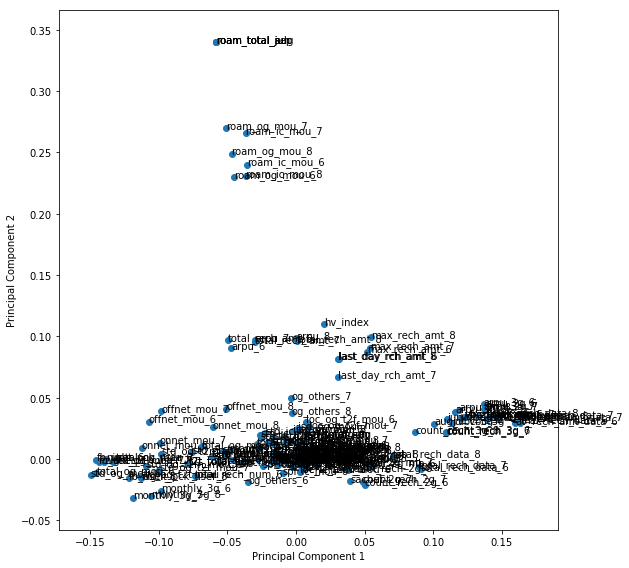

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

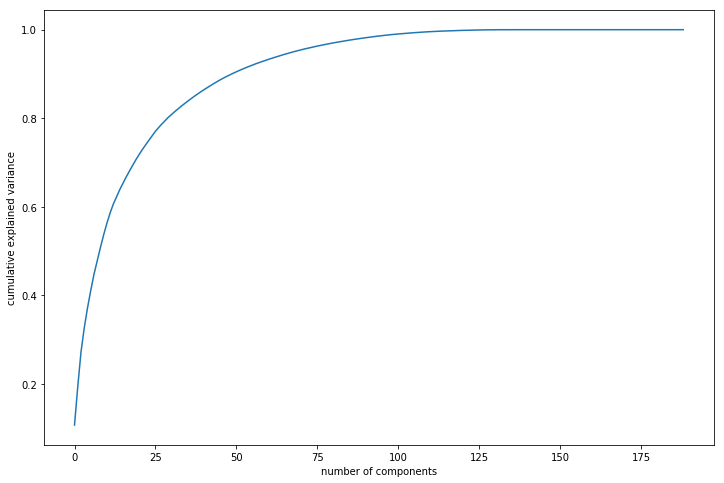

In [66]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [67]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [68]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(38558, 50)

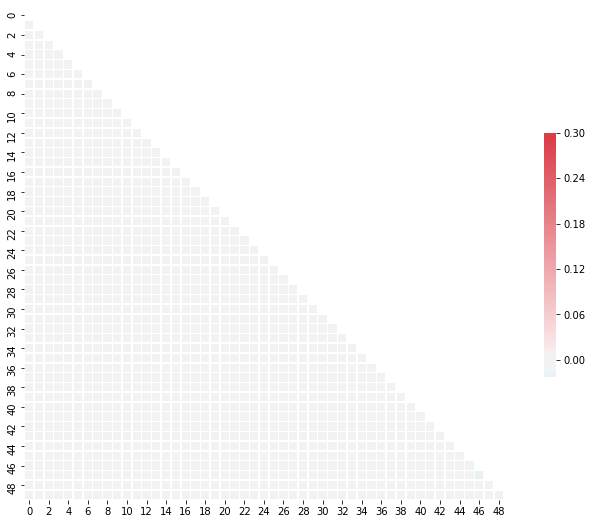

In [69]:
#creating correlation matrix for the principal components
corr = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize = (20,10))
plot_triangular(corr)


In [70]:
# 1s -> 0s in diagonals
corr_nodiag = corr - np.diagflat(corr.diagonal())
print("max corr:",corr_nodiag.max(), ", min corr: ", corr_nodiag.min(),)

max corr: 0.0078053136397929455 , min corr:  -0.02340890975187267


In [71]:
df_test_pca = pca_final.transform(X_test)

#### Run a plain logistic regression  with obtained component

In [72]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca_logistic = LogisticRegression()
model_pca_logistic = learner_pca_logistic.fit(df_train_pca,y_train)

In [73]:
#Making prediction on the test data
pred_probs_test = model_pca_logistic.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.9'

# 6. Model Evaluation
## 1. Logical Regression

In [74]:

churn_lr_pca = PCA(0.90)

#Transform the test and train 
churn_pca_train = churn_lr_pca.fit_transform(X_train)
churn_pca_test = churn_lr_pca.transform(X_test)

#training the regression model
chur_lr_pca_regressor = LogisticRegression()
lr_pca_model_2 = chur_lr_pca_regressor.fit(churn_pca_train,y_train)




#Making prediction on the test data
pred_probs_test2 = lr_pca_model_2.predict_proba(churn_pca_test)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.90'

## 7. SVM

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold

### 1. Linear Kernel
#### a. With PCA

In [76]:
churn_svm_pca_1 = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=100) 

#Train with PCAed train set which created in previous step
svm_pca_churn_model = churn_svm_pca_1.fit(churn_pca_train,y_train)

In [77]:
churn_svm_pca_pred_probs = svm_pca_churn_model.predict(churn_pca_test)
print("{:2.2f}".format(metrics.roc_auc_score(y_test, churn_svm_pca_pred_probs)))

0.83


#### b. With out PCA

In [ ]:
churn_svm_model = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=100) 
svm_churn_model = churn_svm_model.fit(X_train,y_train)
churn_svm_pred_probs = churn_svm_model.predict(X_test)
print("{:2.2f}".format(metrics.roc_auc_score(y_test, churn_svm_pred_probs)))
#import pickle
#pickle.dump(svm_churn_model,open('/tmp/svm_churn_identifier.pkl','wb'))

## 8. Decision Trees

In [79]:
churn_dt_data = churn_data.copy()
# Putting feature variable to X
X = churn_dt_data.drop(['churn'],axis=1)

# Putting response variable to y
y = churn_dt_data['churn']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [80]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      8280
          1       0.68      0.54      0.60       720

avg / total       0.94      0.94      0.94      9000



In [82]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[8095  185]
 [ 328  392]]
0.943


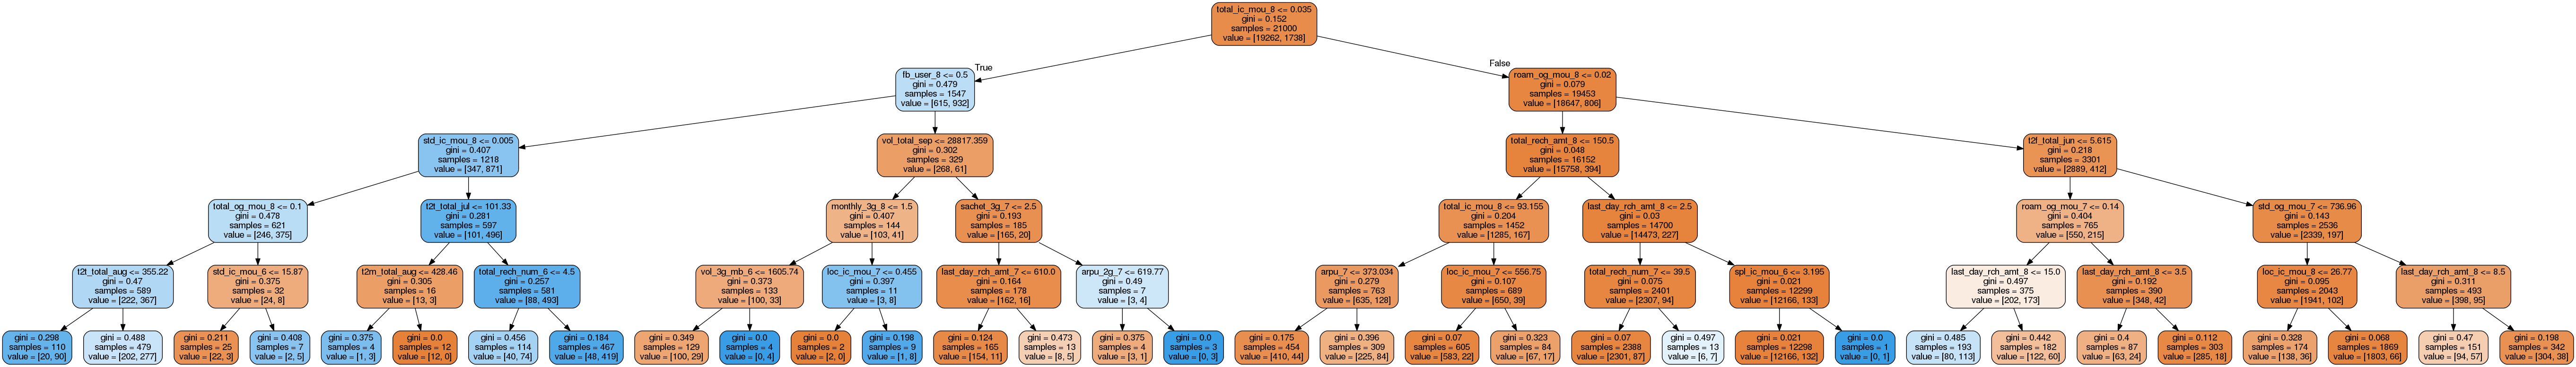

In [83]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot, graphviz

# Putting features
features = X.columns.values
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [84]:
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [85]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/naveen/anaconda3/lib/python

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.214469,0.002949,0.932286,0.932345,1,{'max_depth': 1},10,0.933111,0.932139,0.933111,...,0.929286,0.933095,0.934746,0.931730,0.931174,0.932623,0.030251,0.000314,0.001879,0.000470
1,0.350896,0.002829,0.942143,0.942190,2,{'max_depth': 2},1,0.942157,0.942199,0.943109,...,0.940714,0.942560,0.945225,0.941432,0.939509,0.942861,0.008808,0.000157,0.001970,0.000499
2,0.615512,0.003261,0.942143,0.942226,3,{'max_depth': 3},1,0.942157,0.942378,0.943109,...,0.940714,0.942560,0.945225,0.941432,0.939509,0.942861,0.042223,0.000423,0.001970,0.000505
3,0.816835,0.003104,0.940714,0.943226,4,{'max_depth': 4},3,0.942157,0.942378,0.940252,...,0.937381,0.944048,0.943320,0.943277,0.940462,0.944110,0.042731,0.000488,0.002013,0.000775
4,1.149078,0.003736,0.938476,0.946667,5,{'max_depth': 5},5,0.940728,0.946187,0.933111,...,0.937857,0.946964,0.940938,0.947325,0.939748,0.947325,0.063398,0.000454,0.002896,0.000703


/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


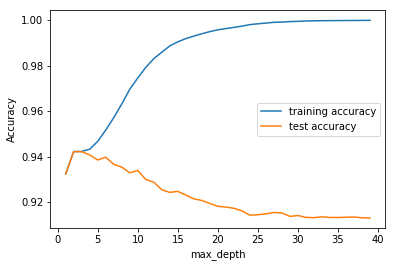

In [86]:
plot_accuracy(scores, parameters)

/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


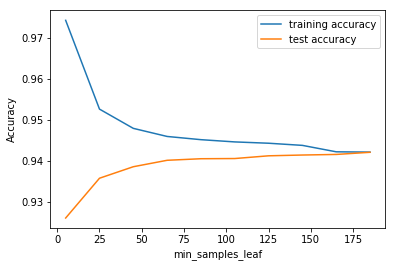

In [87]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)
plot_accuracy(tree.cv_results_, parameters)

/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


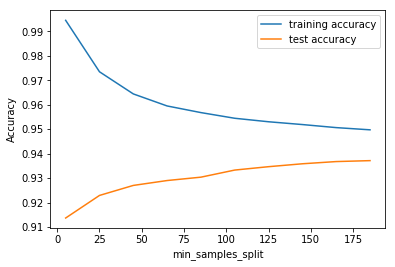

In [88]:
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)
plot_accuracy(tree.cv_results_, parameters)

In [89]:
parameters = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = parameters, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)
#plot_accuracy(grid_search.cv_results_, parameters)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [90]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)


/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/naveen/anaconda3/lib/python

In [91]:
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.419823,0.003165,0.939524,0.944750,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",9,...,0.939286,0.945476,0.944272,0.943753,0.939033,0.945718,0.030813,0.000807,0.002577,0.000927
1,1.411185,0.003094,0.939524,0.944750,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",9,...,0.939286,0.945476,0.944272,0.943753,0.939033,0.945718,0.042572,0.000241,0.002577,0.000927
2,1.351343,0.002865,0.940286,0.944440,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",5,...,0.938095,0.945060,0.944511,0.942742,0.940224,0.945658,0.042662,0.000168,0.002263,0.001027
3,1.356619,0.002844,0.940286,0.944440,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",5,...,0.938095,0.945060,0.944511,0.942742,0.940224,0.945658,0.017807,0.000279,0.002263,0.001027
4,2.310845,0.003297,0.938381,0.946857,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",15,...,0.937619,0.947381,0.944034,0.945539,0.936175,0.947027,0.043087,0.000443,0.002888,0.000671


##### Modeling with best hyper-paramete

In [92]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [93]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9433333333333334

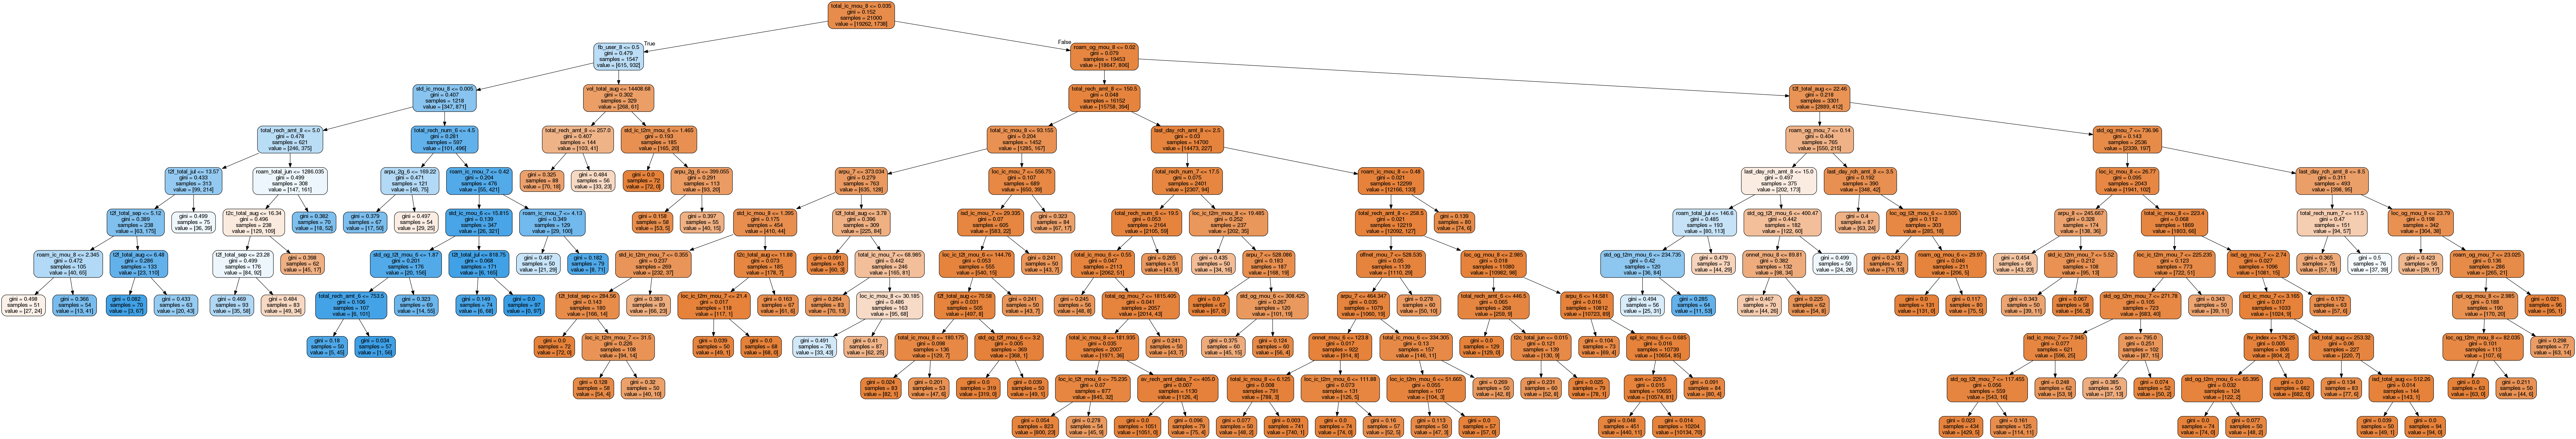

In [94]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [95]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

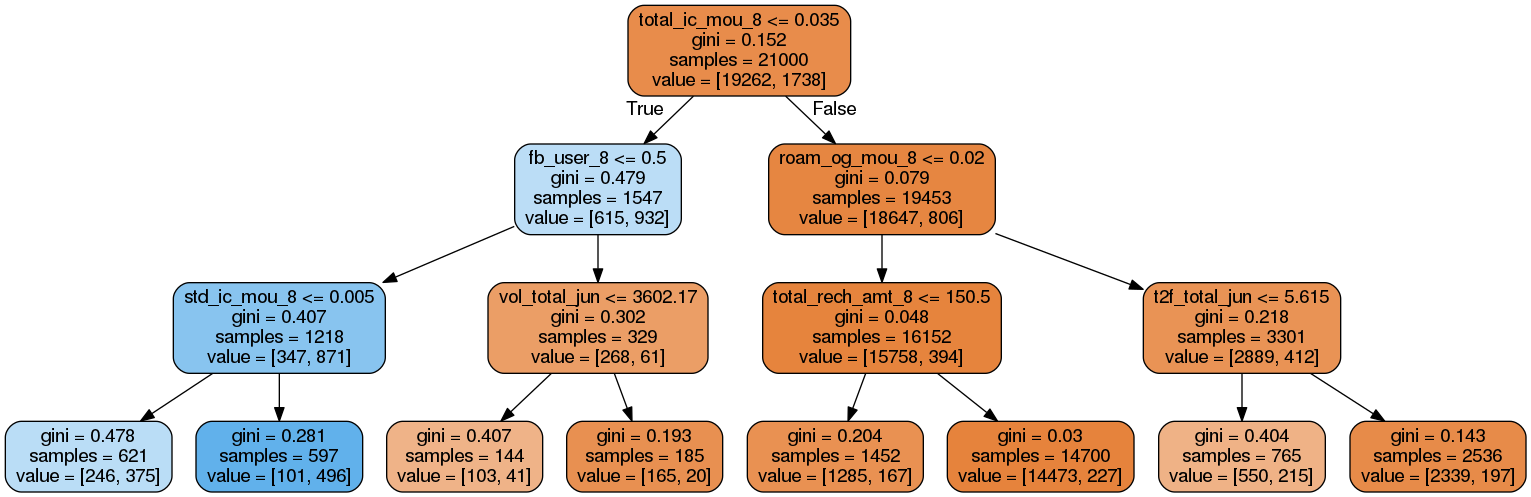

In [96]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [97]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      8280
          1       0.71      0.49      0.58       720

avg / total       0.94      0.94      0.94      9000



In [98]:
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      8280
          1       0.71      0.49      0.58       720

avg / total       0.94      0.94      0.94      9000



In [99]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[8133  147]
 [ 366  354]]


# Notes

## 1. Best model to use

Looks like the SVM model that was built without using the PCA is giving the highest accuracy
An accuracy of 97% on a train-test split of 70-30 is a good indicator that the model is most optimal

The model can be saved to a pickle file to be used for prediction from section 78(uncomment the lines in the respective section to save the model to /tmp)

## 1. Key performers for the given data set

Section 96 shows a Decision tree at max_depth = 3 i.e, it shows the attributes that identify the churn best at a height of 3. Based on that representation, it turns out that the key ientifiers for customers who churn are:
Note: The values are standardized using the standardized scale

1. total_ic_mou_8 <= 0.035
    1. fb_usage_8 <= 0.5
        1. std_ic_mou_8 <=0.005
        2. vol_total_jun <= 3602.17
    2. roam_og_mou_8 <= 0.02
        1. total_rech_amt_8 <= 150.5
        2. t2f_total_jun <= 5.615
    

The above mentioned values strongly predict that the customer might churn